# Dataset preparation (first exploration, cleaning)

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os

sys.path.append(os.path.abspath('../src'))

from data_preparation import *

import warnings
warnings.filterwarnings("ignore")

## Dataset loading

In [10]:
df = pd.read_csv('../data/raw/data_scientist_case.csv')

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (3379778, 20)


,driver_id,trip_id,segment_id,segment_datetime,published_date,signup_date,fixed_signup_country,is_main_segment,unit_seat_price_eur,seat_offered_count,seat_left_count,confirmed_seat_count,segment_distance_km,from_lat,from_lon,to_lat,to_lon,is_comfort,is_auto_accept_mode,publication_site_id
0,"1,396,837","5,582,378","62,200,180",2015-06-10 17:00:00,2012-05-02 00:00:00,2010-09-08 00:00:00,FR,True,34.32,4,3,0,505,47.7413,7.34569,48.9667,2.533300,False,True,0
1,"3,640,947","5,660,204","62,979,529",2015-05-10 02:40:00,2012-05-10 00:00:00,2012-05-02 00:00:00,FR,True,11.88,3,3,0,180,48.8517,2.34040,49.1459,0.227849,False,False,0
2,"3,834,551","5,915,312","65,467,862",2015-06-04 01:50:00,2012-06-04 00:00:00,2012-06-04 00:00:00,FR,True,22.44,3,3,0,352,48.8517,2.34040,48.0835,-1.682720,False,True,0
3,"3,680,123","5,994,384","66,264,106",2015-06-12 02:30:00,2012-06-12 00:00:00,2012-05-10 00:00:00,FR,False,7.92,2,2,0,402,48.8517,2.34040,45.7833,3.083250,False,False,0
4,"3,680,123","5,994,384","66,264,107",2015-06-12 02:30:00,2012-06-12 00:00:00,2012-05-10 00:00:00,FR,False,15.84,2,2,0,598,48.8517,2.34040,44.8350,-0.587269,False,False,0


### Types correction

In [58]:
print(df.dtypes)

driver_id                object
trip_id                  object
segment_id               object
segment_datetime         object
published_date           object
signup_date              object
fixed_signup_country     object
is_main_segment            bool
unit_seat_price_eur      object
seat_offered_count        int64
seat_left_count           int64
confirmed_seat_count      int64
segment_distance_km      object
from_lat                float64
from_lon                float64
to_lat                  float64
to_lon                  float64
is_comfort                 bool
is_auto_accept_mode        bool
publication_site_id      object
dtype: object


In [59]:
# IDs must be integers
id_cols = ["driver_id", "trip_id", "segment_id", "segment_distance_km", "publication_site_id"]
for col in id_cols:
    df[col] = df[col].astype(str).str.replace(",", "").astype(int)

# Dates columns must be in datetime format
date_cols = ['segment_datetime', 'published_date', 'signup_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Converting the price in float 
float_cols = ["unit_seat_price_eur"]
for col in float_cols:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)

## Primary analysis of the data

In [60]:
print("Number of segments:", len(df))
print("Number of trips:", df["trip_id"].nunique())
print("Number of drivers:", df["driver_id"].nunique())

Number of segments: 3379778
Number of trips: 704411
Number of drivers: 466211


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3379778 entries, 0 to 3379777
Data columns (total 20 columns):
 #   Column                Dtype         
---  ------                -----         
 0   driver_id             int64         
 1   trip_id               int64         
 2   segment_id            int64         
 3   segment_datetime      datetime64[ns]
 4   published_date        datetime64[ns]
 5   signup_date           datetime64[ns]
 6   fixed_signup_country  object        
 7   is_main_segment       bool          
 8   unit_seat_price_eur   float64       
 9   seat_offered_count    int64         
 10  seat_left_count       int64         
 11  confirmed_seat_count  int64         
 12  segment_distance_km   int64         
 13  from_lat              float64       
 14  from_lon              float64       
 15  to_lat                float64       
 16  to_lon                float64       
 17  is_comfort            bool          
 18  is_auto_accept_mode   bool          
 19  

In [62]:
df.isna().sum()

driver_id                   0
trip_id                     0
segment_id                  0
segment_datetime            0
published_date              0
signup_date                 0
fixed_signup_country    18496
is_main_segment             0
unit_seat_price_eur         0
seat_offered_count          0
seat_left_count             0
confirmed_seat_count        0
segment_distance_km         0
from_lat                    0
from_lon                    0
to_lat                      0
to_lon                      0
is_comfort                  0
is_auto_accept_mode         0
publication_site_id         0
dtype: int64

In [63]:
# Looking at the main properties of the numerical variables
numerical_var = ["unit_seat_price_eur", "seat_offered_count", "seat_left_count", "confirmed_seat_count", "segment_distance_km", "from_lat", "from_lon", "to_lat", "to_lon"]
df[numerical_var].describe()

,unit_seat_price_eur,seat_offered_count,seat_left_count,confirmed_seat_count,segment_distance_km,from_lat,from_lon,to_lat,to_lon
count,3.379778e+06,3.379778e+06,3.379778e+06,3.379778e+06,3.379778e+06,3.379778e+06,3.379778e+06,3.379778e+06,3.379778e+06
mean,1.826350e+01,2.597236e+00,1.641318e+00,2.116163e-01,2.322642e+02,4.570182e+01,1.724135e+00,4.566911e+01,1.729998e+00
std,1.760167e+01,8.551173e-01,1.267805e+00,6.155031e-01,2.188181e+02,2.960465e+00,3.409355e+00,2.972543e+00,3.439444e+00
min,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,-2.625650e+01,-1.746610e+01,-2.625650e+01,-1.736600e+01
25%,6.600000e+00,2.000000e+00,0.000000e+00,0.000000e+00,8.300000e+01,4.366830e+01,-5.869700e-01,4.364640e+01,-5.869700e-01
50%,1.320000e+01,3.000000e+00,2.000000e+00,0.000000e+00,1.700000e+02,4.583630e+01,2.046460e+00,4.583360e+01,2.069450e+00
75%,2.508000e+01,3.000000e+00,3.000000e+00,0.000000e+00,3.240000e+02,4.799730e+01,4.725390e+00,4.792940e+01,4.728410e+00
max,2.921160e+03,8.000000e+00,8.000000e+00,7.000000e+00,3.276700e+04,6.330890e+01,1.075760e+02,6.558480e+01,1.075760e+02


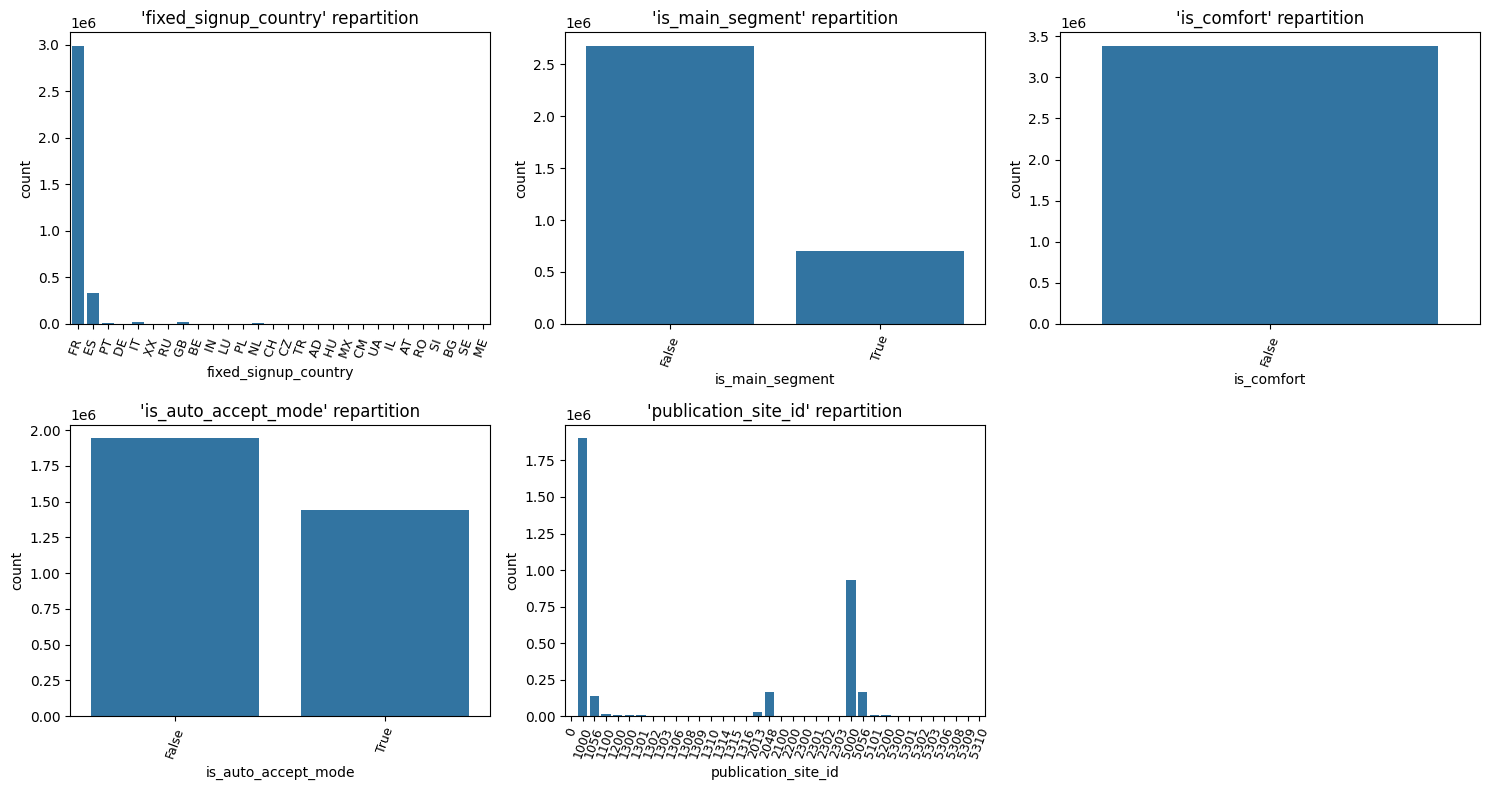

In [64]:
# Looking at the main properties of the categorical variables
categorical_var = ["fixed_signup_country", "is_main_segment", "is_comfort", "is_auto_accept_mode", "publication_site_id"]
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_var):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=col)
    plt.title(f"'{col}' repartition")
    plt.xticks(rotation=70, fontsize=9)
plt.tight_layout()
plt.show()

In [65]:
# 'success' variable definition = if at least 1 seat is confirmed
df["success"] = df["confirmed_seat_count"] > 0
success_rate = df["success"].mean()
print(f"Rate of segments with passengers: {success_rate:.2%}")

Rate of segments with passengers: 13.20%


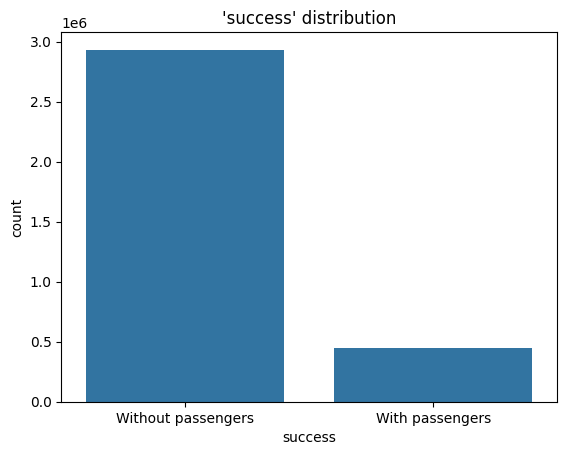

In [66]:
# Visualization if the variable 'success'
sns.countplot(data=df, x="success")
plt.title("'success' distribution")
plt.xticks([0, 1], ["Without passengers", "With passengers"])
plt.show()

## Data cleaning

### Handling missing values

In [67]:
df.isna().sum()

driver_id                   0
trip_id                     0
segment_id                  0
segment_datetime            0
published_date              0
signup_date                 0
fixed_signup_country    18496
is_main_segment             0
unit_seat_price_eur         0
seat_offered_count          0
seat_left_count             0
confirmed_seat_count        0
segment_distance_km         0
from_lat                    0
from_lon                    0
to_lat                      0
to_lon                      0
is_comfort                  0
is_auto_accept_mode         0
publication_site_id         0
success                     0
dtype: int64

In [68]:
df["fixed_signup_country"].unique()

array(['FR ', 'ES ', nan, 'PT ', 'DE ', 'IT ', 'XX ', 'RU ', 'GB ', 'BE ',
       'IN ', 'LU ', 'PL ', 'NL ', 'CH ', 'CZ ', 'TR ', 'AD ', 'HU ',
       'MX ', 'CM ', 'UA ', 'IL ', 'AT ', 'RO ', 'SI ', 'BG ', 'SE ',
       'ME '], dtype=object)

In [69]:
df["fixed_signup_country"].value_counts()

fixed_signup_country
FR     2986190
ES      329593
IT       14397
GB       14304
PT        6194
NL        5534
XX        1200
DE        1154
PL         936
BE         708
CH         430
RU         250
LU          85
UA          64
AD          48
RO          32
CZ          29
BG          28
TR          26
HU          21
IN          19
IL          13
SI          11
MX           7
CM           3
AT           3
SE           2
ME           1
Name: count, dtype: int64

In [70]:
print("FR represents", (df[df["fixed_signup_country"]=="FR "].fixed_signup_country.count()/len(df)).round(2), "% of the dataset")

FR represents 0.88 % of the dataset


Only the variable **fixed_signup_country** has missing values, it represent 18496 lines. The value 'XX' seems also to be due to a lack of indformation on the signup country and represent 1200 lines.

These mising values represent a consequent amount of lines and could be informative for the model, so we can replace NaN and XX by 'missing' and create a new feature with this information.

Also we can group fixed_signup_country into 'FR', 'foreign', and 'missing' to simplify interpretation and ensure robust analysis, as FR alone represents nearly 90% of the data.

In [73]:
# Simple imputation + indicator creation
df["fixed_signup_country"] = df["fixed_signup_country"].fillna("missing")
# XX can be considered as not referenced, so treated like a missing value
df["fixed_signup_country"] = df["fixed_signup_country"].replace({"XX ": "missing"})
df["fixed_signup_country_grouped"] = df["fixed_signup_country"].apply(lambda x: x if x in ['FR ', 'missing'] else 'foreign')
df["signup_country_missing"] = df["fixed_signup_country"] == "missing"

### Handling inconsistencies

In [74]:
print((df['confirmed_seat_count'] > df['seat_offered_count']).sum(), "lines have confirmed_seat_count > seat_offered_count")
print((df['seat_left_count'] + df['confirmed_seat_count'] != df['seat_offered_count']).sum(), "lines have an inconsistent sum of seats")
print((df['segment_distance_km'] <= 0).sum(), "lines have distance <= 0")
print((df['unit_seat_price_eur'] < 0).sum(), "lines have a negative price")
print((df['unit_seat_price_eur'] == 0).sum(), "lines have a null price")
print((df['published_date'] > df['segment_datetime']).sum(), "lines have published_date after segment_datetime")
print((df["signup_date"] > df["published_date"]).sum(), "lines have signup_date after published_date")

29 lines have confirmed_seat_count > seat_offered_count
1409322 lines have an inconsistent sum of seats
1489 lines have distance <= 0
0 lines have a negative price
497 lines have a null price
78 lines have published_date after segment_datetime
1 lines have signup_date after published_date


78 lines present a temporal inconsistency: the published date of the trip (published_date) is later than the departure date (segment_datetime). These routes have been removed, as their temporal logic is invalid and could distort model learning.

In [75]:
# Quickly cheking if the negative or null distances have almost same departure and arrival point
df_temp = df[df['segment_distance_km'] <= 0].copy()
df_temp["computed_distance"] = df_temp.apply(calc_geo_distance, axis=1)
print("max incoherent distance: ", df_temp.computed_distance.max().round(2), "km")

max incoherent distance:  1.15 km


1489 lines have distance < 0 which is inconsistent. After a recalculation of geographic distances from the latitude and longiture data, we can see that these segemnts represent trips <1.15km which are non representative of a reel ride and suggest that it's almost the same departure and arrival point. So these lines will be droped from the dataset.

In [76]:
# Analysing the success rate for free rides to see if it would add value for the model
free_trips = df[df["unit_seat_price_eur"] == 0]
non_free_trips = df[df["unit_seat_price_eur"] > 0]

print("Success rate (free):", free_trips["success"].mean())
print("Success rate (not free):", non_free_trips["success"].mean())

Success rate (free): 0.0
Success rate (not free): 0.13204524867863904


In this case, the routes offered at zero price represent around 500 observations. The success rate for these journeys is 0%, which suggests that they are not really intended to be booked (tests, errors, inactive offers...). They were therefore excluded from the analysis in order to avoid introducing noise into the prediction model.

In [77]:
# Inconsistencies suppression
df = df[df["confirmed_seat_count"] <= df["seat_offered_count"]] 
df = df[df['segment_distance_km'] > 0]
df = df[df['published_date'] <= df['segment_datetime']]
df = df[df["signup_date"] <= df["published_date"]]
df = df[df['unit_seat_price_eur'] > 0]

1409322 have an inconsistent seat sum: seat_left_count + confirmed_seat_count != seat_offered_count. This represents a large part of the dataset, so we can make a trade correction seat_left_count = seat_offered_count - confirmed_seat_count.

In [78]:
# Correction of the seats count because a lot of lines (1409322) are inconsistent

# Redefinition of seat_left_count
df['seat_left_count_corrected'] = df['seat_offered_count'] - df['confirmed_seat_count']

# Check invalid cases
invalid = df[df['seat_left_count_corrected'] < 0]
print("Number of invalid cases deleted: ", len(invalid))

# Delete invalid lines
df = df[df['seat_left_count_corrected'] >= 0]

df['seat_left_count'] = df['seat_left_count_corrected']
df.drop(columns=['seat_left_count_corrected'], inplace=True)


Number of invalid cases deleted:  0


### Handling outliers

,unit_seat_price_eur,seat_offered_count,seat_left_count,confirmed_seat_count,segment_distance_km,from_lat,from_lon,to_lat,to_lon
count,3.377689e+06,3.377689e+06,3.377689e+06,3.377689e+06,3.377689e+06,3.377689e+06,3.377689e+06,3.377689e+06,3.377689e+06
mean,1.827277e+01,2.597260e+00,2.385548e+00,2.117125e-01,2.323549e+02,4.570162e+01,1.723998e+00,4.566895e+01,1.729850e+00
std,1.760087e+01,8.551095e-01,1.008462e+00,6.156134e-01,2.187317e+02,2.960452e+00,3.409248e+00,2.972416e+00,3.439307e+00
min,1.254000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-2.625650e+01,-1.746610e+01,-2.625650e+01,-1.736600e+01
25%,6.600000e+00,2.000000e+00,2.000000e+00,0.000000e+00,8.300000e+01,4.366790e+01,-5.869700e-01,4.364640e+01,-5.869700e-01
50%,1.320000e+01,3.000000e+00,3.000000e+00,0.000000e+00,1.700000e+02,4.583630e+01,2.046380e+00,4.583360e+01,2.069450e+00
75%,2.508000e+01,3.000000e+00,3.000000e+00,0.000000e+00,3.240000e+02,4.799730e+01,4.725390e+00,4.792940e+01,4.728410e+00
max,2.921160e+03,8.000000e+00,8.000000e+00,7.000000e+00,3.276700e+04,6.330890e+01,1.075760e+02,6.558480e+01,1.075760e+02


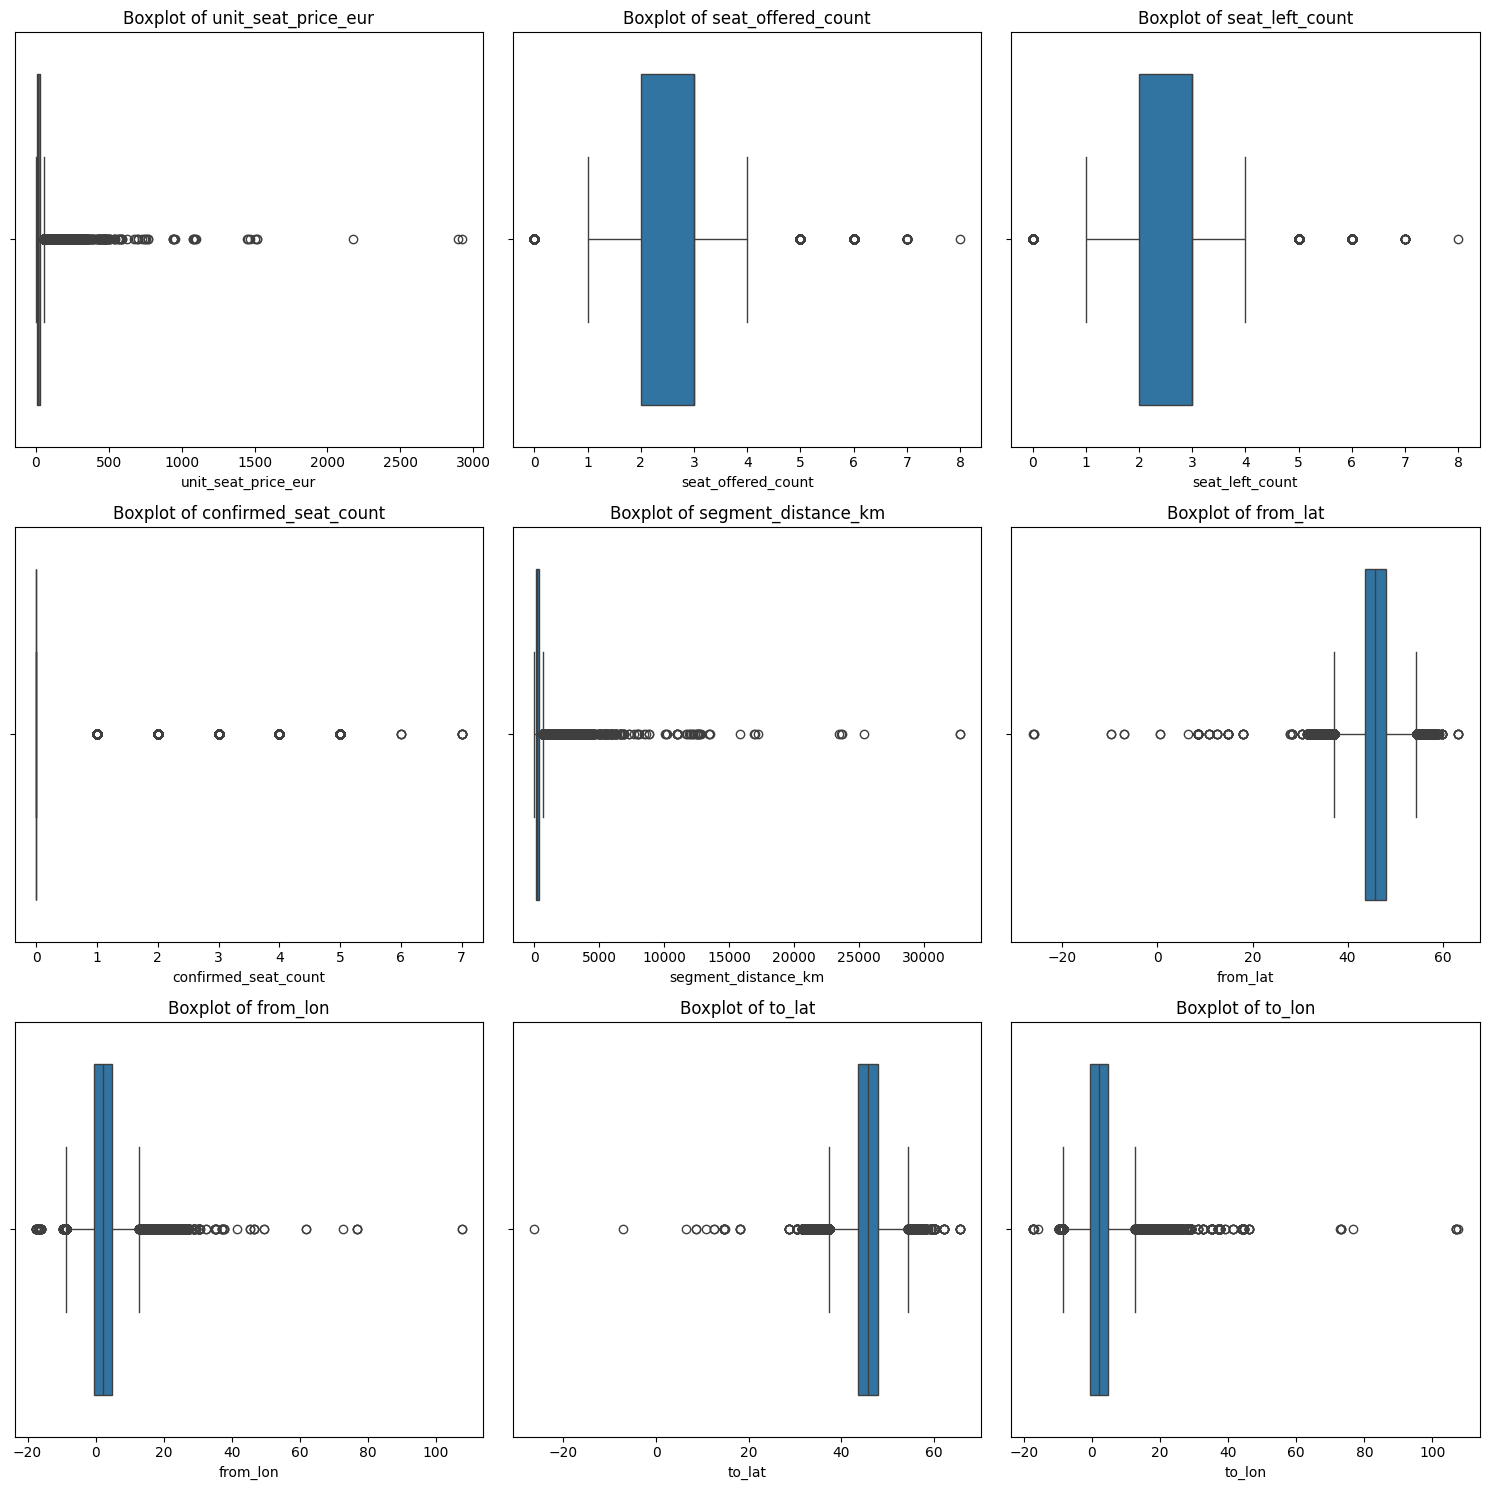

In [79]:
# Exploring numerical variables
numerical_var = ["unit_seat_price_eur", "seat_offered_count", "seat_left_count", "confirmed_seat_count", "segment_distance_km", "from_lat", "from_lon", "to_lat", "to_lon"]
display(df[numerical_var].describe())

plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_var):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

I chose not to use the classic IQR method because I believe that business considerations are very important in this case.

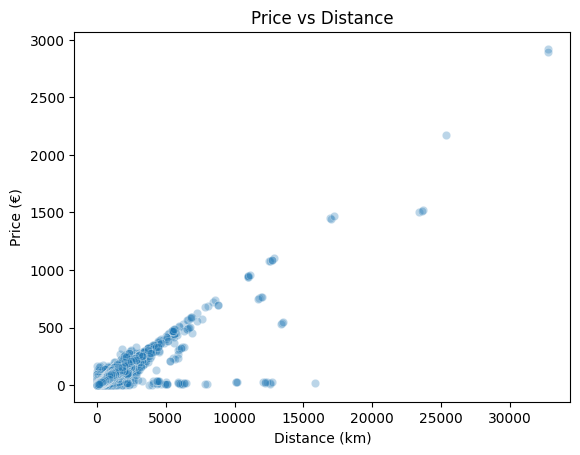

In [80]:
# Checking if the price and the distance have a linear relation

sns.scatterplot(
    data=df,
    x="segment_distance_km", 
    y="unit_seat_price_eur",
    alpha=0.3
)
plt.title("Price vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Price (€)")
plt.show()

In [81]:
# Investigating the segments with more than 6000km
df[df["segment_distance_km"]>6000][["unit_seat_price_eur", "segment_distance_km", "from_lat", "from_lon", "to_lat", "to_lon"]].head()

,unit_seat_price_eur,segment_distance_km,from_lat,from_lon,to_lat,to_lon
546,327.36,6203,8.54251,13.9137,43.5389,5.40543
3598,320.76,6119,8.54251,13.9137,43.9475,4.82077
3599,333.96,6291,8.54251,13.9137,43.1154,5.93542
12549,318.12,6087,8.54251,13.9137,44.1379,4.80749
29738,533.28,6227,37.60050,61.8315,45.7640,4.83566


To ensure realistic and representative modeling, we can remove trips with a distance over 6,000 km. BlaBlaCar is a carpooling service limited to feasible road journeys, and such extreme distances (for instance France to South Africa) are highly unlikely, certainly due to data errors. These outliers represent less than 0.01% of the dataset and can distort distributions and model training. The 6,000 km threshold was chosen based on business logic and empirical distribution analysis.

In [82]:
# Deletion of distance outliers
df = df[df["segment_distance_km"]<6000]

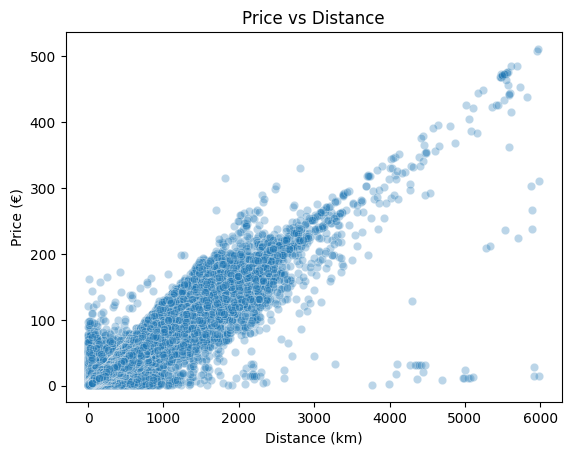

In [83]:
# Checking if the values are coherent 
sns.scatterplot(
    data=df,
    x="segment_distance_km", 
    y="unit_seat_price_eur",
    alpha=0.3
)
plt.title("Price vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Price (€)")
plt.show()

A maximum price around 500€ seems to be consistent for long distances.

8 seats offered seems consistent, but we can remove the cases where 0 seat is offered because the success would be impossible and there's no point in being on the platform if no seat is ofered.

In [84]:
# Deletion of lines with 0 seat offered
df = df[df["seat_offered_count"]>0]

In [85]:
# Coordinates checking
check_coord_ranges(df)

from_lat_invalid: 0 invalid values
from_lon_invalid: 0 invalid values
to_lat_invalid: 0 invalid values
to_lon_invalid: 0 invalid values


### Checking duplicates

In [86]:
print("segment_id unique ?", df["segment_id"].is_unique)
print("Number of duplicates on segment_id :", df["segment_id"].duplicated().sum())

segment_id unique ? True
Number of duplicates on segment_id : 0


### Last checks

In [87]:
df.nunique()

driver_id                        463322
trip_id                          696318
segment_id                      3349106
segment_datetime                 285868
published_date                      283
signup_date                        3351
fixed_signup_country                 28
is_main_segment                       2
unit_seat_price_eur                2625
seat_offered_count                    8
seat_left_count                       9
confirmed_seat_count                  8
segment_distance_km                2820
from_lat                          51099
from_lon                          79440
to_lat                            49412
to_lon                            75155
is_comfort                            1
is_auto_accept_mode                   2
publication_site_id                  36
success                               2
fixed_signup_country_grouped          3
signup_country_missing                2
dtype: int64

We can remove is_comfort column, since a single modality wouldn't help the model to capture anything, and it's not woth analysis.

In [88]:
df.drop(['is_comfort'], axis=1, inplace=True)

## Saving dataset

In [89]:
df.to_parquet("../data/processed/clean_dataset.parquet")